In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('/content/heart (1).csv')

In [3]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [4]:
df.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

In [5]:
df.shape

(918, 12)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [7]:
df.duplicated().sum()

np.int64(0)

<Axes: xlabel='HeartDisease'>

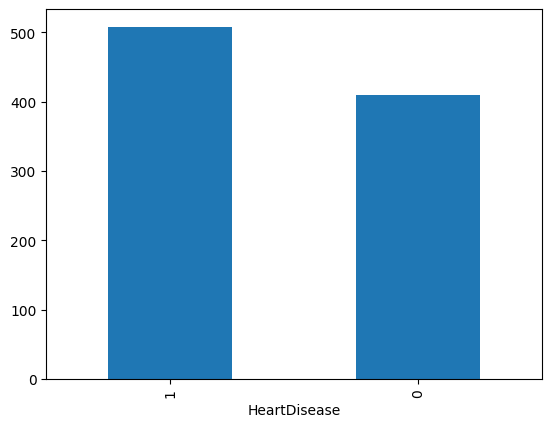

In [9]:
df['HeartDisease'].value_counts().plot(kind='bar')

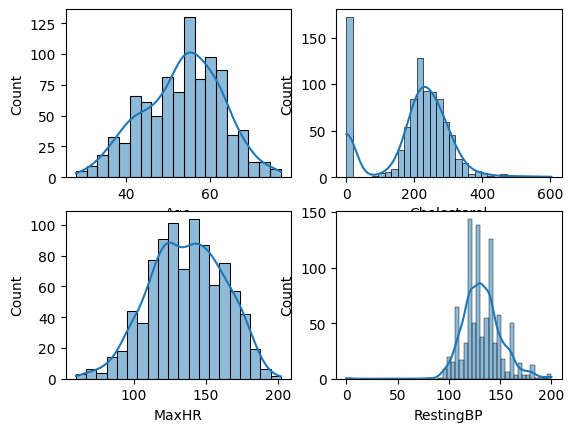

In [20]:
def plotting(var,num):
   plt.subplot(2,2,num)
   sns.histplot(df[var],kde=True)
plotting('Age',1)
plotting('Cholesterol',2)
plotting('MaxHR',3)
plotting('RestingBP',4)



In [21]:
df['Cholesterol'].value_counts()

,count
Cholesterol,
0,172
254,11
220,10
223,10
204,9
...,...
353,1
278,1
157,1


In [24]:
mean_count=df.loc[df['Cholesterol']!=0,'Cholesterol'].mean()

In [25]:
mean_count

np.float64(244.6353887399464)

In [27]:
df['Cholesterol']=df['Cholesterol'].replace(0,mean_count).round(2)

In [28]:
df['Cholesterol']

,Cholesterol
0,289.0
1,180.0
2,283.0
3,214.0
4,195.0
...,...
913,264.0
914,193.0
915,131.0
916,236.0


In [30]:
mean_count=df.loc[df['RestingBP']!=0,'RestingBP'].mean()
df['RestingBP']=df['RestingBP'].replace(0,mean_count)
df['RestingBP']=df['RestingBP'].round(2)

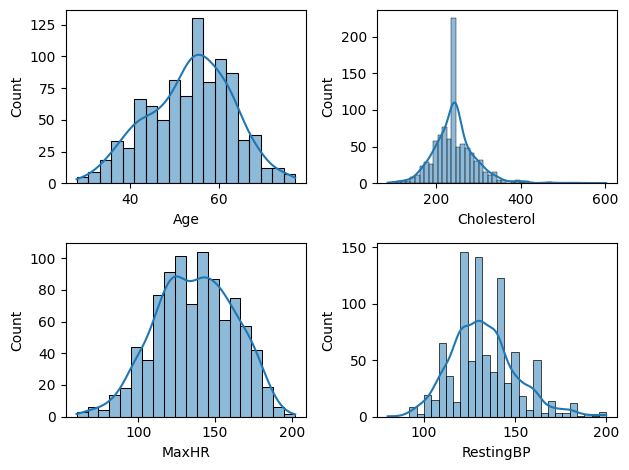

In [32]:
def plotting(var,num):
   plt.subplot(2,2,num)
   sns.histplot(df[var],kde=True)
plotting('Age',1)
plotting('Cholesterol',2)
plotting('MaxHR',3)
plotting('RestingBP',4)
plt.tight_layout()



<Axes: xlabel='Sex', ylabel='count'>

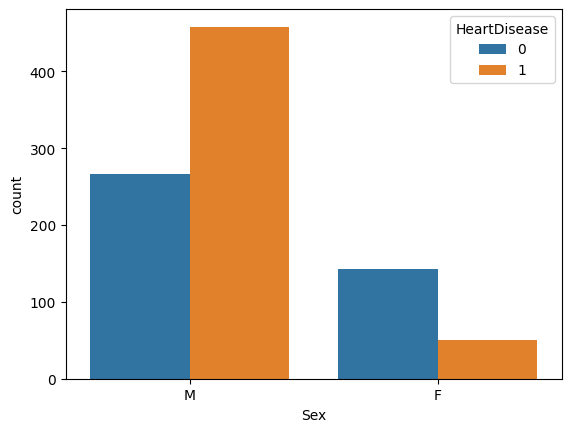

In [39]:
sns.countplot(x=df['Sex'],hue=df['HeartDisease'])
#we can see males are more as compared to females

<Axes: xlabel='ChestPainType', ylabel='count'>

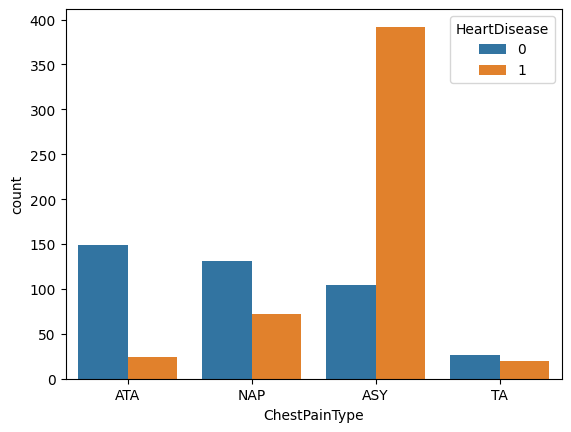

In [38]:
sns.countplot(x=df['ChestPainType'],hue=df['HeartDisease'])

<Axes: xlabel='FastingBS', ylabel='count'>

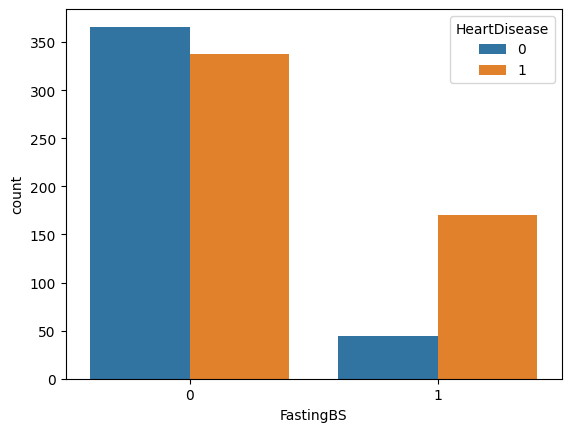

In [41]:
sns.countplot(x=df['FastingBS'],hue=df['HeartDisease'])

<Axes: xlabel='HeartDisease', ylabel='Cholesterol'>

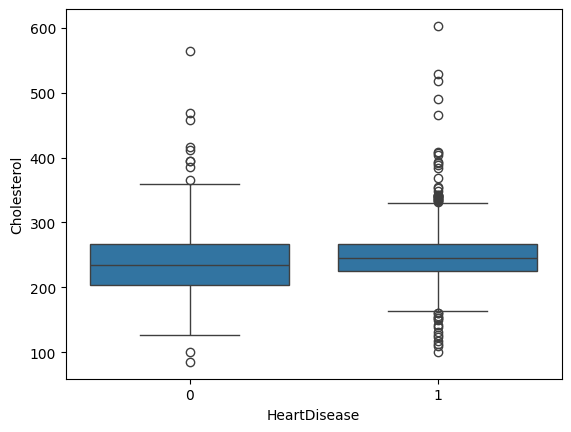

In [43]:
sns.boxplot(x=df['HeartDisease'],y=df['Cholesterol'],data=df)

<Axes: xlabel='HeartDisease', ylabel='Age'>

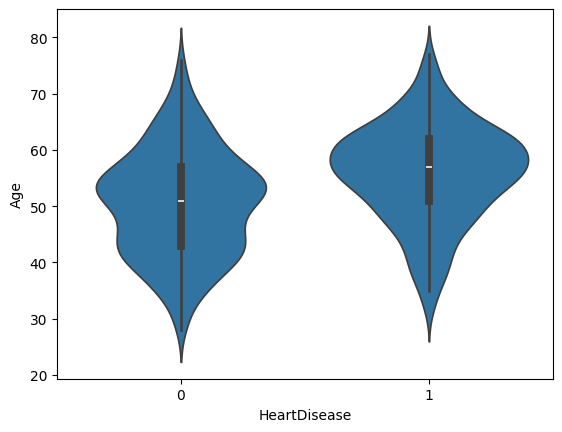

In [44]:
sns.violinplot(x=df['HeartDisease'],y=df['Age'],data=df)

<Axes: >

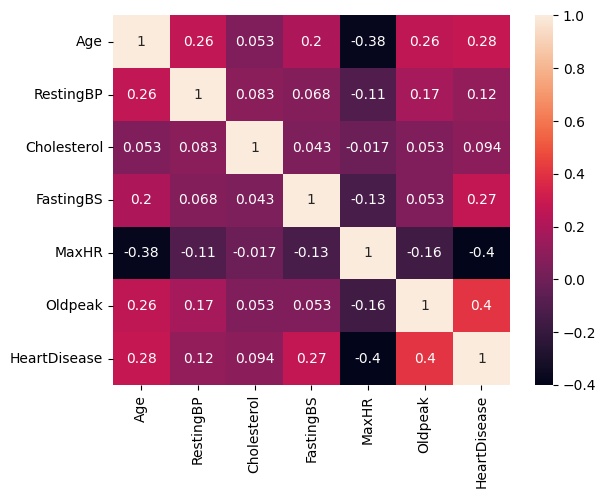

In [45]:
sns.heatmap(df.corr(numeric_only=True),annot=True)

In [46]:
df_encode=pd.get_dummies(df,drop_first=True)

In [47]:
df_encode=df_encode.astype(int)

In [48]:
df_encode

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up
0,40,140,289,0,172,0,0,1,1,0,0,1,0,0,0,1
1,49,160,180,0,156,1,1,0,0,1,0,1,0,0,1,0
2,37,130,283,0,98,0,0,1,1,0,0,0,1,0,0,1
3,48,138,214,0,108,1,1,0,0,0,0,1,0,1,1,0
4,54,150,195,0,122,0,0,1,0,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,110,264,0,132,1,1,1,0,0,1,1,0,0,1,0
914,68,144,193,1,141,3,1,1,0,0,0,1,0,0,1,0
915,57,130,131,0,115,1,1,1,0,0,0,1,0,1,1,0
916,57,130,236,0,174,0,1,0,1,0,0,0,0,0,1,0


In [49]:
#standard scaling
from sklearn.preprocessing import StandardScaler
numeric_cols=['Age','RestingBP','Cholesterol','MaxHR','Oldpeak']
scaler=StandardScaler()
df_encode[numeric_cols]=scaler.fit_transform(df_encode[numeric_cols])

In [50]:
df_encode

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up
0,-1.433140,0.414885,0.834754,0,1.382928,-0.727592,0,1,1,0,0,1,0,0,0,1
1,-0.478484,1.527224,-1.210675,0,0.754157,0.282891,1,0,0,1,0,1,0,0,1,0
2,-1.751359,-0.141284,0.722161,0,-1.525138,-0.727592,0,1,1,0,0,0,1,0,0,1
3,-0.584556,0.303651,-0.572651,0,-1.132156,0.282891,1,0,0,0,0,1,0,1,1,0
4,0.051881,0.971054,-0.929194,0,-0.581981,-0.727592,0,1,0,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,-0.902775,-1.253622,0.365619,0,-0.188999,0.282891,1,1,0,0,1,1,0,0,1,0
914,1.536902,0.637353,-0.966725,1,0.164684,2.303858,1,1,0,0,0,1,0,0,1,0
915,0.370100,-0.141284,-2.130180,0,-0.857069,0.282891,1,1,0,0,0,1,0,1,1,0
916,0.370100,-0.141284,-0.159813,0,1.461525,-0.727592,1,0,1,0,0,0,0,0,1,0
